<a href="https://colab.research.google.com/github/lucaasnathan/DataScience-RegressaoLinear/blob/main/Exercicios_Aula_08_Regress%C3%A3o_Linear_Simples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aluno: Lucas Nathan de Oliveira

Exercícios:

- Faça um filtro por cidades como Campinas, São Paulo, etc para encontrar notas com distribuições normais para comparação.
- A nota de redação é uma forte candidata a distribuição normal conforme os exercícios das últimas aulas. 
- Para ter uma maior variabilidade teste o conjunto em cidades com mais de 40 entradas. 
- Teste a normalidade da coluna de NOTA_REDACAO (qqplot e teste de hipotese)
- Nao e necessário o comentário em cada célula. 
- Utilize os conceitos de correlação para identificar possíveis variáveis para aplicar regressão linear simples.



## **Correlação e Regressão**

In [2]:
import numpy as np
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
df_enem = pd.read_csv('/content/drive/MyDrive/ciencia_de_dados/trabalho_2_semestre/enem_2019_tratado_hipoteses.csv',
                      sep=',', encoding='iso-8859-1')
df_enem

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,22,M,1,parda,1,1,não_respondeu,NaN,...,600.2,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim
1,"1,90E+11",São Paulo,17,F,1,parda,1,2,privada,15567761.0,...,731.8,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Não
2,"1,90E+11",São Bernardo do Campo,19,M,1,parda,1,2,pública,35904958.0,...,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim
3,"1,90E+11",Embu-Guaçu,17,F,1,parda,1,2,pública,NaN,...,419.2,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim
4,"1,90E+11",Guarulhos,23,F,1,branca,1,1,não_respondeu,NaN,...,796.1,Inglês,1.0,160.0,200.0,180.0,180.0,160.0,880.0,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499935,"1,90E+11",São Paulo,18,F,1,parda,1,1,não_respondeu,NaN,...,479.1,Espanhol,1.0,100.0,120.0,120.0,140.0,100.0,580.0,Sim
499936,"1,90E+11",São Paulo,17,F,1,preta,1,2,pública,35925457.0,...,43.2,Espanhol,1.0,80.0,120.0,140.0,120.0,100.0,560.0,Sim
499937,"1,90E+11",São Paulo,17,F,1,parda,1,2,pública,35001156.0,...,487.3,Inglês,1.0,120.0,80.0,60.0,120.0,0.0,380.0,Sim
499938,"1,90E+11",São Paulo,17,M,1,parda,1,2,pública,NaN,...,401.1,Inglês,1.0,160.0,120.0,160.0,140.0,160.0,740.0,Não


In [5]:
df_enem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499940 entries, 0 to 499939
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   NU_INSCRICAO             499940 non-null  object 
 1   NO_MUNICIPIO_RESIDENCIA  499940 non-null  object 
 2   IDADE                    499940 non-null  int64  
 3   SEXO                     499940 non-null  object 
 4   TP_ESTADO_CIVIL          499940 non-null  int64  
 5   RACA                     499940 non-null  object 
 6   TP_NACIONALIDADE         499940 non-null  int64  
 7   TP_ST_CONCLUSAO          499940 non-null  int64  
 8   ESCOLA                   499940 non-null  object 
 9   CO_ESCOLA                176894 non-null  float64
 10  NO_MUNICIPIO_ESC         176894 non-null  object 
 11  TP_PRESENCA_CN           499940 non-null  int64  
 12  TP_PRESENCA_CH           499940 non-null  int64  
 13  TP_PRESENCA_LC           499940 non-null  int64  
 14  TP_P

Escolher cidade 

In [6]:
df_santos=df_enem[df_enem['NO_MUNICIPIO_RESIDENCIA']=="Santos"]
df_santos

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
19,"1,90E+11",Santos,29,F,1,parda,1,1,não_respondeu,NaN,...,544.9,Espanhol,1.0,120.0,120.0,100.0,100.0,80.0,520.0,Sim
166,"1,90E+11",Santos,18,F,1,parda,1,2,pública,35011940.0,...,426.2,Inglês,1.0,160.0,120.0,160.0,120.0,120.0,680.0,Sim
413,"1,90E+11",Santos,18,F,1,parda,1,2,pública,35011903.0,...,395.3,Espanhol,1.0,120.0,120.0,100.0,80.0,120.0,540.0,Não
422,"1,90E+11",Santos,18,F,1,branca,1,2,privada,35154271.0,...,632.6,Inglês,1.0,160.0,140.0,180.0,200.0,160.0,840.0,Sim
454,"1,90E+11",Santos,45,M,1,preta,1,1,não_respondeu,NaN,...,44.9,Inglês,1.0,80.0,120.0,140.0,120.0,60.0,520.0,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499692,"1,90E+11",Santos,17,F,1,branca,1,2,pública,35011897.0,...,531.2,Espanhol,1.0,80.0,120.0,120.0,100.0,0.0,420.0,Sim
499810,"1,90E+11",Santos,17,M,1,branca,1,2,pública,35011897.0,...,611.1,Inglês,1.0,140.0,200.0,160.0,160.0,140.0,800.0,Sim
499843,"1,90E+11",Santos,24,F,1,branca,1,1,não_respondeu,NaN,...,503.7,Inglês,1.0,120.0,120.0,100.0,120.0,40.0,500.0,Sim
499856,"1,90E+11",Santos,18,F,1,parda,1,2,pública,NaN,...,491.7,Espanhol,1.0,120.0,120.0,120.0,100.0,100.0,560.0,Sim


In [8]:
import plotly.express as px
grafico = px.box(df_santos, y="NOTA_REDACAO")
grafico.show()

In [9]:
import scipy.stats as stats
import matplotlib.pyplot as plt

In [11]:
# Teste Shapiro-Wilk
stats.shapiro(df_santos.NOTA_REDACAO)

ShapiroResult(statistic=0.9637987017631531, pvalue=1.6755355417298787e-31)

In [12]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [13]:
# Teste Lilliefors (Kolmogorov_Sminorv)
statsmodels.stats.diagnostic.lilliefors(df_santos.NOTA_REDACAO, dist = 'norm')

(0.07823907265445587, 0.0009999999999998899)

In [14]:
import seaborn as sns

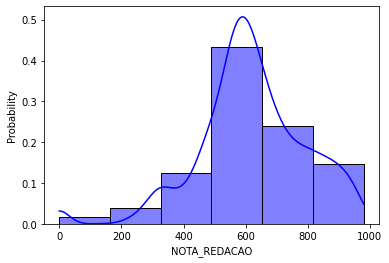

In [16]:
sns.histplot(df_santos, x='NOTA_REDACAO', bins=6, color="blue", kde=True, stat="probability");


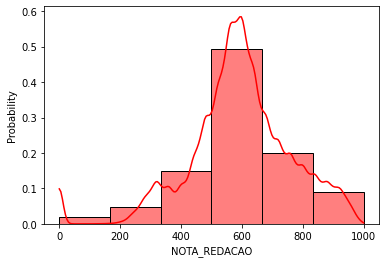

In [17]:
sns.histplot(df_enem, x='NOTA_REDACAO', bins=6, color="red", kde=True, stat="probability");


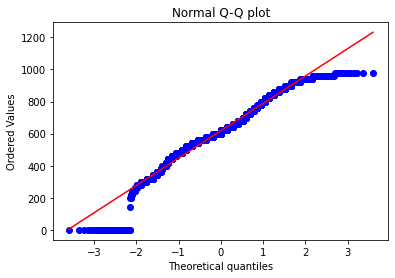

In [18]:
stats.probplot(df_santos['NOTA_REDACAO'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

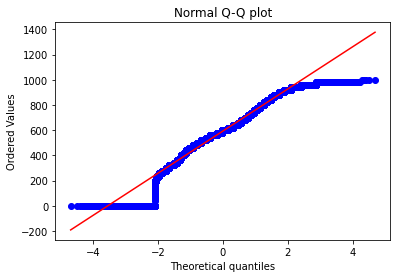

In [19]:
stats.probplot(df_enem['NOTA_REDACAO'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [20]:
# Lista com nota final
nota_final = ['NOTA_CN','NOTA_CH','NOTA_MT','NOTA_LC', 'NOTA_REDACAO']

In [26]:
df_santos['nota_final'] = (df_santos[nota_final].mean(axis=1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
df_santos = df_santos[['NOTA_CN','NOTA_MT','NOTA_LC','NOTA_CH','NOTA_REDACAO','nota_final']]


In [28]:
correlacoes = df_santos.corr(method='pearson')
correlacoes

,NOTA_CN,NOTA_MT,NOTA_LC,NOTA_CH,NOTA_REDACAO,nota_final
NOTA_CN,1.000000,0.174084,0.085524,0.145830,0.245612,0.541508
NOTA_MT,0.174084,1.000000,0.104193,0.182694,0.317398,0.638707
NOTA_LC,0.085524,0.104193,1.000000,0.109131,0.176186,0.486041
NOTA_CH,0.145830,0.182694,0.109131,1.000000,0.236735,0.569472
NOTA_REDACAO,0.245612,0.317398,0.176186,0.236735,1.000000,0.685804
nota_final,0.541508,0.638707,0.486041,0.569472,0.685804,1.000000


In [29]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [30]:
regressao = smf.ols('nota_final ~ NOTA_REDACAO', data = df_santos).fit()
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:             nota_final   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     3808.
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:43:26   Log-Likelihood:                -24412.
No. Observations:                4290   AIC:                         4.883e+04
Df Residuals:                    4288   BIC:                         4.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      280.9128      4.043     69.483   

In [31]:
regressao = smf.ols('nota_final ~ NOTA_CN', data = df_santos).fit()
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:             nota_final   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     1779.
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:43:42   Log-Likelihood:                -25030.
No. Observations:                4290   AIC:                         5.006e+04
Df Residuals:                    4288   BIC:                         5.008e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    360.3879      4.014     89.787      0.0